# Ketapel Gravitasi (Gravitational Slingshot)

## Imports

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Konstanta

Referensi:
1. https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html
2. https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
3. https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
4. https://en.wikipedia.org/wiki/Gravitational_constant

In [87]:
G = 6.67e-11

mM = 1.989e30
mB = 5.9722e24
mJ = 1898e24

vM = 0
vB = 29.78e3
vJ = 13.06e3

rM = 0
rB = 149.596e9
rJ = 778.570e9

## Perhitungan Percepatan

Persamaan gaya tarik menarik antar dua benda bermassa.

$$\vec{F} = G\frac{m_1m_2}{||\vec{r}||^2}\hat{r}$$

Percepatan suatu benda sebab tarik menarik dengan benda lain.

$$\vec{a} = G\frac{m}{||\vec{r}||^2}\hat{r}$$

Rumus mencari $||\vec{r}||$

$$||\vec{r}|| = \sqrt{x^2 + y^2 + z^2 + ...}$$

Rumus mencari $\hat{r}$

$$\hat{r} = \frac{\vec{r}}{||\vec{r}||}$$

In [88]:
def accel(r1, r2, m):
    rvec = r1-r2                    # Jarak antara kedua benda
    norm = np.linalg.norm(rvec)     # Besar jaraknya
    rhat = rvec/norm                # Arahnya
    accl = -G * m / norm**2 * rhat  # Percepatannya

    return accl

## Percobaan simulasi revolusi Bumi

In [89]:
def diff(t, y):
    rM = np.array([0, 0])
    rB = np.array([y[0], y[2]])

    bxa = y[1]
    bya = y[3]

    bva = accel(rB, rM, mM)
    
    bvxa = bva[0]
    bvya = bva[1]

    return np.array([bxa, bvxa, bya, bvya])

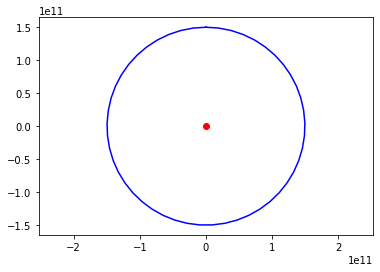

In [90]:
sol = solve_ivp(diff, [0, 365.25*24*60*60], [0, vB, rB, 0], dense_output=True, rtol=1e-8)

t = np.linspace(0, 365.25*24*60*60)
y = sol.sol(t)

plt.scatter(0, 0, color="red", marker="o", label="Matahari")
plt.plot(y[0], y[2], color="blue", label="Bumi")
plt.axis("equal")
plt.show()

## Simulasi Bumi, Jupiter, dan Roket

In [91]:
def diff(t, y):
    rM = np.array([0, 0])
    rB = np.array([y[0], y[2]])
    rJ = np.array([y[4], y[6]])
    rR = np.array([y[8], y[10]])

    bxa = y[1]
    bya = y[3]
    bva = accel(rB, rM, mM)
    bvxa = bva[0]
    bvya = bva[1]

    jxa = y[5]
    jya = y[7]
    jva = accel(rJ, rM, mM)
    jvxa = jva[0]
    jvya = jva[1]

    rxa = y[9]
    rya = y[11]
    rva = accel(rR, rM, mM) + accel(rR, rJ, mJ) + accel(rR, rB, mB)
    rvxa = rva[0]
    rvya = rva[1]

    return np.array([bxa, bvxa, bya, bvya, 
                     jxa, jvxa, jya, jvya,
                     rxa, rvxa, rya, rvya])

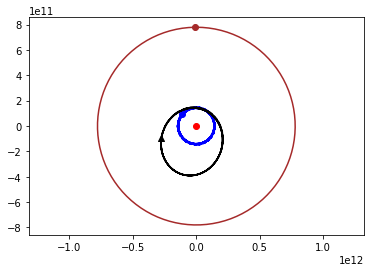

In [92]:
sol = solve_ivp(
    diff, 
    [0, 4332.589*24*60*60], 
    [0, vB, rB, 0, 
    0, vJ, rJ, 0, 
    0, vB+11.19e3, rB+1e7, 0], 
    dense_output=True, 
    rtol=1e-8
)

t = np.linspace(0, 4332.589*24*60*60, 100)
y = sol.sol(t)

plt.scatter(0, 0, color="red", marker="o", label="Matahari")

plt.scatter(y[0][-1], y[2][-1], color="blue", marker="o")
plt.scatter(y[4][-1], y[6][-1], color="brown", marker="o")
plt.scatter(y[8][-1], y[10][-1], color="black", marker="^")

plt.plot(y[0], y[2], color="blue", label="Bumi")
plt.plot(y[4], y[6], color="brown", label="Jupiter")
plt.plot(y[8], y[10], color="black", label="Roket")

plt.axis("equal")
plt.show()

## Simulasi Jupiter dan Roket dengan mengabaikan Bumi

In [93]:
def diff(t, y):
    rM = np.array([0, 0])
    rJ = np.array([y[0], y[2]])
    rR = np.array([y[4], y[6]])

    jxa = y[1]
    jya = y[3]
    jva = accel(rJ, rM, mM)
    jvxa = jva[0]
    jvya = jva[1]

    rxa = y[5]
    rya = y[7]
    rva = accel(rR, rM, mM) + accel(rR, rJ, mJ)
    rvxa = rva[0]
    rvya = rva[1]

    return np.array([jxa, jvxa, jya, jvya,
                     rxa, rvxa, rya, rvya])

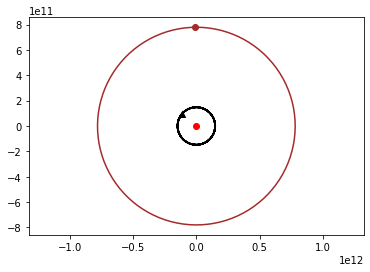

In [94]:
sol = solve_ivp(
    diff, 
    [0, 4332.589*24*60*60], 
    [0, vJ, rJ, 0, 
     0, vB, rB+1e7, 0], 
     dense_output=True, 
     rtol=1e-8
)

t = np.linspace(0, 4332.589*24*60*60, 200)
y = sol.sol(t)

plt.scatter(0, 0, color="red", marker="o", label="Matahari")
plt.scatter(y[0][-1], y[2][-1], color="brown", marker="o")
plt.scatter(y[4][-1], y[6][-1], color="black", marker="^")
plt.plot(y[0], y[2], color="brown", label="Jupiter")
plt.plot(y[4], y[6], color="black", label="Roket")
plt.axis("equal")
plt.show()

### Animasi

In [95]:
from matplotlib import animation, rc

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(-1e12, 1e12)
ax.set_ylim(-1e12, 1e12)

jupiter, = ax.plot([], [], color="brown", marker="o")
roket, = ax.plot([], [], color="black", marker="^")
matahari, = ax.plot(0, 0, color="red", marker="o")

def init():
    return ()

def animate(i):
    jupiter.set_data(y[0][i], y[2][i])
    roket.set_data(y[4][i], y[6][i])
    return (jupiter, roket)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, repeat=True, interval=1/8)
anim

# Uncomment kalau mau save animasi
# dpi = 96
# fig.set_size_inches(1920/dpi, 1080/dpi, True)
# anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, repeat=True)
# writer = animation.writers['ffmpeg'](fps=30)
# anim.save('video.mp4',writer=writer,dpi=dpi)

## Simulasi Jupiter dan Roket tapi tidak pernah ketemu



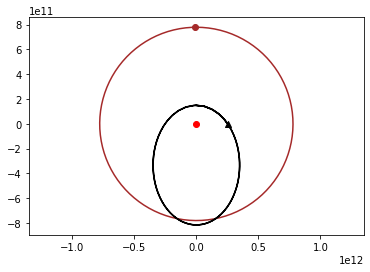

In [96]:
sol = solve_ivp(
    diff, 
    [0, 4332.589*24*60*60], 
    [0, vJ, rJ, 0, 
     0, vB*1.3, rB+1e7, 0], 
     dense_output=True, 
     rtol=1e-8
)

t = np.linspace(0, 4332.589*24*60*60, 200)
y = sol.sol(t)

plt.scatter(0, 0, color="red", marker="o", label="Matahari")
plt.scatter(y[0][-1], y[2][-1], color="brown", marker="o")
plt.scatter(y[4][-1], y[6][-1], color="black", marker="^")
plt.plot(y[0], y[2], color="brown", label="Jupiter")
plt.plot(y[4], y[6], color="black", label="Roket")
plt.axis("equal")
plt.show()

### Animasi

In [97]:
from matplotlib import animation, rc

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(-1e12, 1e12)
ax.set_ylim(-1e12, 1e12)

jupiter, = ax.plot([], [], color="brown", marker="o")
roket, = ax.plot([], [], color="black", marker="^")
matahari, = ax.plot(0, 0, color="red", marker="o")

def init():
    return ()

def animate(i):
    jupiter.set_data(y[0][i], y[2][i])
    roket.set_data(y[4][i], y[6][i])
    return (jupiter, roket)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, repeat=True, interval=1/8)
anim

# Uncomment kalau mau save animasi
# dpi = 96
# fig.set_size_inches(1920/dpi, 1080/dpi, True)
# anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, repeat=True)
# writer = animation.writers['ffmpeg'](fps=30)
# anim.save('video.mp4',writer=writer,dpi=dpi)

## Simulalsi Jupiter dan Roket dengan mengatur lokasi Jupiter

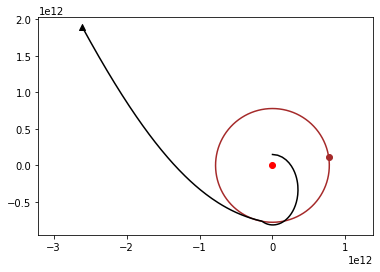

In [98]:
shift = np.radians(8)

sol = solve_ivp(
    diff, 
    [0, 4332.589*24*60*60], 
    [rJ*np.cos(shift), vJ*np.sin(shift), rJ*np.sin(shift), -vJ*np.cos(shift), 
     0, vB*1.3, rB, 0], 
     dense_output=True, 
     rtol=1e-8
)

t = np.linspace(0, 4332.589*24*60*60, 200)
y = sol.sol(t)

plt.scatter(0, 0, color="red", marker="o", label="Matahari")

plt.scatter(y[0][-1], y[2][-1], color="brown", marker="o")
plt.scatter(y[4][-1], y[6][-1], color="black", marker="^")

plt.plot(y[0], y[2], color="brown", label="Jupiter")
plt.plot(y[4], y[6], color="black", label="Roket")

plt.axis("equal")

plt.show()

### Animasi

In [99]:
from matplotlib import animation, rc

fig, ax = plt.subplots()
plt.close()

ax.set_xlim(-1e12, 1e12)
ax.set_ylim(-1e12, 1e12)

jupiter, = ax.plot([], [], color="brown", marker="o")
roket, = ax.plot([], [], color="black", marker="^")
matahari, = ax.plot(0, 0, color="red", marker="o")

def init():
    return ()

def animate(i):
    jupiter.set_data(y[0][i], y[2][i])
    roket.set_data(y[4][i], y[6][i])
    return (jupiter, roket)

# Comment kalau mau save animasi
anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, repeat=True, interval=1/8)
anim

# Uncomment kalau mau save animasi
# dpi = 96
# fig.set_size_inches(1920/dpi, 1080/dpi, True)
# anim = animation.FuncAnimation(fig, animate, frames=len(y[0]), blit=False, repeat=True)
# writer = animation.writers['ffmpeg'](fps=30)
# anim.save('video.mp4',writer=writer,dpi=dpi)